In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('ggplot')

dimensions de X: (200, 2)
dimensions de y: (200, 1)


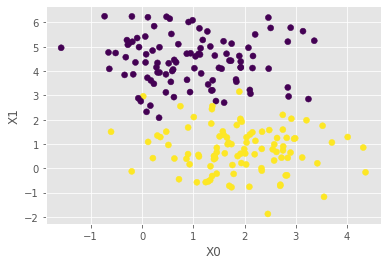

In [60]:
X,y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=y)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

# Model

In [61]:
def weights_gen(X):
  w = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return w, b

In [62]:
w, b = weights_gen(X)

In [63]:
w

array([[-0.58307917],
       [ 0.62890269]])

In [64]:
b

array([-2.6540059])

In [65]:
def model(X, w, b):
  z = X.dot(w) + b
  return 1 / (1 + np.exp(-z))


# Loss-Function

In [66]:
def log_loss(A,y):
  return (-1 / X.shape[0]) * np.sum(y * np.log(A) + (1-y) * np.log(1 - A))


# Gradient Descent

In [67]:
def gradients(X, y, A):
  dw = 1/X.shape[0] * X.T.dot(A-y)
  db = 1/X.shape[0] * np.sum(A-y)
  return dw, db

def update(dw, db, w, b, lr):
  w = w - lr * dw
  b = b - lr * db
  return w, b

# Predictions

In [68]:
def predict(X, w, b):
  A = model(X, w, b)
  print(A[0])
  return A >= .5

# Artificial Neuron

In [69]:
from sklearn import metrics
def artifical_neuron(X, y, lr=.01, n_iter=250):
  # Initialisation of weights w and biais b
  w, b = weights_gen(X)
  Loss = []

  for i in range(n_iter):
    # activation == model
    A = model(X, w, b)
    # log loss
    Loss.append(log_loss(A, y))
    # gradients
    dw, db = gradients(X, y, A)
    # update weights w and biais b
    w, b = update(dw, db, w, b, lr)
  
  y_pred = predict(X, w, b)
  print(f"Accuracy Score: {metrics.accuracy_score(y, y_pred)}")
  # print(f"ROC-AUC Score: {metrics.roc_auc_score(y, y_pred)}")

  plt.plot(Loss)
  plt.show()

  return w, b


[0.96178223]
Accuracy Score: 0.93


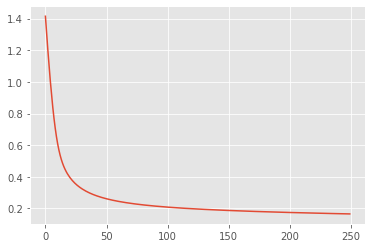

(array([[ 1.36610899],
        [-1.40012042]]), array([1.12611264]))

In [70]:
artifical_neuron(X, y, lr=.1, n_iter=250)

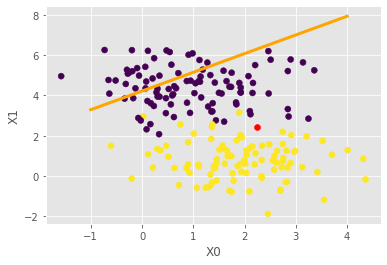

In [71]:
new_point = np.array([2.24, 2.43])
x0 = np.linspace(-1, 4, 200)
x1 = (-w[0] * x0 -b) / w[1]
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=y)
plt.scatter(new_point[0], new_point[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [72]:
def prediction(data):
  p = predict(data, w, b)[0]
  print(p)
  if p:
    print('purple')
  else:
    print('yellow')

In [73]:
prediction(new_point)

0.08077453296543734
False
yellow


In [74]:
prediction(np.array([1, -1.5]))

0.015061474427793691
False
yellow


In [75]:
from utilities import *

In [76]:
X_train, y_train, X_test, y_test = load_data()

In [77]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 64, 64), (1000, 1), (200, 64, 64), (200, 1))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


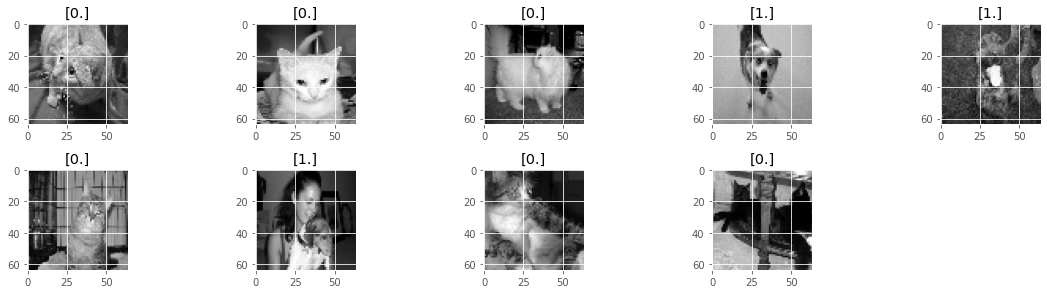

In [78]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [79]:
from sklearn import metrics
from tqdm import tqdm


def artificial_neuron_custom(X_train, y_train, X_test, y_test, lr=.01, n_iter=1000):
  # Initialisation of weights w and biais b
  w, b = weights_gen(X_train)
  train_loss = []
  test_loss = []
  train_acc = []
  test_acc = []

  for i in tqdm(range(n_iter)):
    # activation == model
    A = model(X_train, w, b)

    if i % 10 == 0:
      # Train
      train_loss.append(log_loss(A, y_train))
      y_pred = predict(X_train, w, b)
      train_acc.append(metrics.accuracy_score(y_train, y_pred))

      # Test
      A_test = model(X_test, w, b)
      test_loss.append(log_loss(A_test, y_test))
      y_pred_test = predict(X_test, w, b)
      test_acc.append(metrics.accuracy_score(y_test, y_pred_test))
      
    # gradients
    dw, db = gradients(X_train, y_train, A)
    # update weights w and biais b
    w, b = update(dw, db, w, b, lr)
  
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='train loss')
  plt.plot(test_loss, label='test loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(train_acc, label='train acc')
  plt.plot(test_acc, label='test acc')
  plt.legend()
  plt.show()

  return w, b


In [80]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(1000, 4096)

In [81]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test.shape

(200, 4096)

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train[:2]

array([[0.64566929, 0.68503937, 0.64173228, ..., 0.34251969, 0.70866142,
        0.15354331],
       [0.16535433, 0.16929134, 0.15354331, ..., 0.21653543, 0.20472441,
        0.21653543]])

In [84]:
def predict(X, w, b):
  A = model(X, w, b)
  return A >= .5

def log_loss(A,y):
  epsilon = 1e-15
  return (-1 / X.shape[0]) * np.sum(y * np.log(A) + epsilon + (1-y) * np.log(1 - A + epsilon))


100%|██████████| 100000/100000 [09:05<00:00, 183.21it/s]


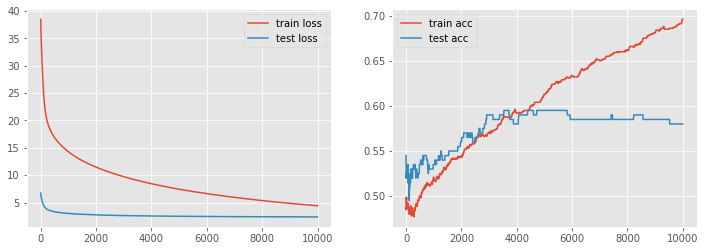

(array([[-1.46017676],
        [ 0.41462582],
        [-0.39061383],
        ...,
        [ 0.1534221 ],
        [ 0.65706565],
        [-0.87249635]]), array([0.56754417]))

In [85]:
artificial_neuron_custom(X_train, y_train, X_test, y_test, lr=0.001, n_iter=10000)